## Original link
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import minmax_scale

In [3]:
%matplotlib inline

## Загружаем данные

In [4]:
dataset = pd.read_csv('winequality-red.csv.gz', compression='gzip', sep=';')

In [5]:
dataset.shape

(1599, 12)

In [6]:
f_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [7]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
X = dataset[f_names].values
y = dataset['quality'].values

### Выполняем преобразование признаков

In [9]:
X = minmax_scale(X)

### Разделяем выборку на train и test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Обучаем модель 

In [11]:
# model = LinearRegression()
model = Lasso(alpha=0.01)
# model = ElasticNet(alpha=1.5, l1_ratio=0.7)

In [12]:
model.fit(X_train, y_train)

Lasso(alpha=0.01)

### Оцениваем получившиеся параметры модели

In [13]:
pd.DataFrame(data=np.array([f_names, model.coef_]).T, columns=['F_NAME','COEF'])

,F_NAME,COEF
0,fixed acidity,0.0806276155312684
1,volatile acidity,-1.367168799858385
2,citric acid,0.0
3,residual sugar,-0.0
4,chlorides,-0.0
5,free sulfur dioxide,-0.0
6,total sulfur dioxide,-0.0
7,density,-0.0
8,pH,-0.0
9,sulphates,0.09872028063454201


## Смотрим на метрики для test-части

In [14]:
y_pred = model.predict(X_test)

In [15]:
r2_score(y_pred=y_pred, y_true=y_test)

0.28616799065733023

In [16]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

0.5356478562603832

In [17]:
mean_squared_error(y_pred=y_pred, y_true=y_test)

0.4538781859403808

### Визуализируем матрицу ошибок

In [18]:
y_pred_round = np.round(y_pred)
labels = np.array([str(i) for i in range(0,10)])

In [19]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

In [21]:
def plt_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, #ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[]

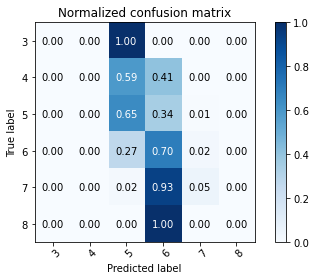

In [22]:
plt_confusion_matrix(classes=labels, y_pred = y_pred_round, y_true=y_test, normalize=True)
plt.plot()

[]

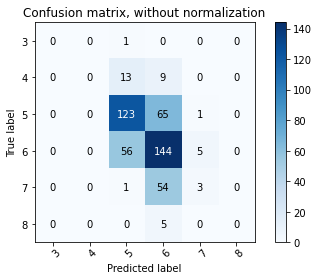

In [23]:
plt_confusion_matrix(classes=labels, y_pred=y_pred_round, y_true=y_test)
plt.plot()

### Визуализируем ошибки предсказаний

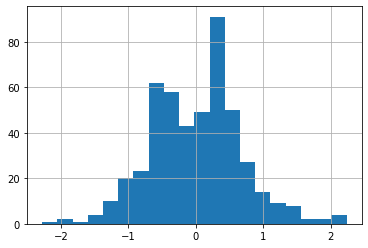

In [24]:
plt.hist((y_pred-y_test), bins=20)
plt.grid()
plt.show()